# 1 - Unsupervised Learning

Import some important libraries

In [253]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

tf.get_logger().setLevel('ERROR')

K-Means Clustering

Firstly we assign each point to its closest centroid

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    m = X.shape[0]
    K = centroids.shape[0]
    
    idx = np.zeros(m)
    
    for i in range(m):
        len_min = np.linalg.norm(X[i] - centroids[0])**2
        len = 0
        for j in range(1,K):
            len = np.linalg.norm(X[i] - centroids[j])**2
            
            if(len < len_min):
                len_min = len
                idx[i] = j
    
    return idx

Prepare the data

The shape of X is: (300, 2)


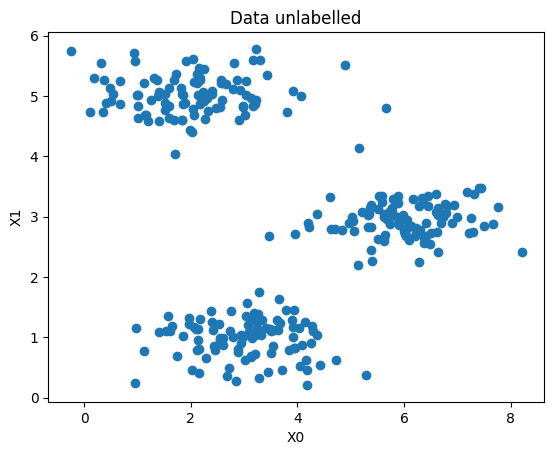

In [30]:
X =np.array([[1.84,4.61],[5.66,4.80],[6.35,3.29],[2.90,4.61],[3.23,4.94],[1.25,4.93],[1.98,4.43],[2.23,5.06],[2.98,4.84],[2.98,4.81],[2.11,5.37],[2.12,5.21],[1.51,4.77],[2.17,5.27],[0.42,4.88],[2.47,4.80],[4.06,5.00],[3.01,4.68],[0.67,4.87],[3.16,4.84],[0.51,4.91],[3.13,4.96],[2.05,5.62],[0.67,5.24],[1.02,4.84],[2.18,5.30],[2.86,5.26],[1.31,5.30],[0.99,5.02],[1.40,4.58],[2.66,5.20],[2.80,5.12],[2.07,4.68],[3.30,5.59],[1.89,4.89],[2.56,5.26],[1.15,4.68],[2.25,5.45],[2.21,4.91],[1.59,4.83],[1.68,5.27],[2.59,4.93],[2.81,5.54],[0.95,5.58],[1.52,5.04],[3.23,5.78],[2.54,4.81],[3.81,4.74],[1.68,4.60],[2.18,4.86],[1.82,5.13],[1.86,4.87],[3.03,5.24],[2.93,5.10],[3.43,5.34],[3.20,4.86],[0.11,4.73],[1.41,5.07],[2.24,4.92],[1.37,5.26],[1.71,4.04],[1.92,5.58],[1.60,4.64],[0.38,5.26],[2.02,4.41],[1.12,5.21],[2.27,4.62],[-0.25,5.74],[2.13,5.01],[1.84,5.03],[2.33,4.75],[1.52,4.88],[1.02,5.01],[1.85,5.01],[2.20,4.95],[1.20,4.58],[1.02,4.63],[1.60,5.14],[0.48,5.14],[0.36,4.73],[0.31,5.55],[2.29,5.01],[2.15,5.46],[2.05,4.78],[4.89,5.51],[2.40,5.08],[2.57,5.21],[1.83,4.60],[0.55,5.03],[3.17,5.59],[3.04,5.01],[2.40,5.03],[0.18,5.30],[2.61,5.22],[2.30,4.97],[3.91,5.09],[2.06,5.23],[1.38,5.00],[1.16,4.68],[1.73,5.36],[3.20,0.72],[3.06,1.57],[4.02,1.16],[1.40,1.09],[4.08,0.87],[3.15,0.98],[3.45,0.43],[3.85,0.79],[1.57,1.35],[4.72,0.62],[2.88,0.75],[0.97,1.16],[1.53,1.10],[4.14,1.25],[3.16,1.29],[2.95,0.90],[3.28,1.75],[2.13,0.96],[3.33,1.28],[2.54,0.96],[3.23,1.08],[4.43,0.54],[3.56,1.12],[4.26,0.91],[4.05,0.53],[3.09,1.09],[2.85,0.27],[3.64,1.12],[1.96,1.32],[2.88,0.80],[3.48,1.14],[3.50,1.10],[2.46,0.79],[3.20,1.03],[3.01,0.63],[1.97,1.22],[2.18,1.31],[2.61,0.99],[3.96,0.83],[3.65,1.63],[4.18,0.45],[3.79,1.45],[3.30,1.28],[3.03,1.36],[3.18,1.41],[4.17,0.21],[3.24,1.15],[3.92,1.01],[2.97,1.01],[1.13,0.77],[2.72,0.49],[3.12,0.69],[2.41,1.12],[2.96,1.02],[1.65,1.19],[2.40,1.25],[2.28,0.65],[2.80,1.00],[3.41,1.16],[3.51,0.74],[3.94,1.46],[3.90,1.28],[2.61,0.88],[4.37,1.03],[3.08,1.20],[2.12,0.79],[2.16,0.40],[2.14,1.14],[1.85,1.02],[4.16,0.62],[2.76,1.43],[3.91,1.17],[2.54,0.98],[4.28,1.18],[3.31,1.03],[2.16,0.81],[3.71,0.46],[3.54,0.86],[1.61,1.11],[1.75,0.69],[3.12,0.68],[2.37,1.43],[2.53,1.22],[3.68,1.23],[3.27,0.32],[3.94,0.83],[3.26,1.38],[4.30,1.11],[2.68,0.35],[3.13,1.28],[2.94,1.03],[3.12,1.33],[2.02,0.45],[3.62,1.29],[2.43,0.86],[2.10,1.14],[5.29,0.37],[2.07,1.17],[0.95,0.25],[2.74,1.10],[6.01,2.73],[6.06,2.95],[6.77,3.21],[5.64,2.69],[5.63,2.99],[6.17,3.29],[7.25,2.97],[5.58,3.34],[5.36,3.15],[4.71,2.79],[7.43,3.47],[6.64,3.06],[6.37,2.56],[7.29,2.75],[6.20,2.68],[5.39,2.27],[5.67,2.96],[6.60,3.07],[7.76,3.16],[6.63,3.15],[5.77,3.14],[5.99,2.76],[6.38,2.65],[5.74,3.10],[4.62,2.79],[5.34,3.04],[5.37,2.82],[5.04,2.92],[5.53,3.34],[6.05,2.81],[5.13,2.20],[5.73,2.88],[6.78,3.06],[6.45,3.35],[6.40,2.90],[5.86,3.00],[6.45,3.17],[5.37,3.20],[5.89,3.35],[3.96,2.72],[6.28,3.17],[4.21,2.82],[5.33,3.03],[7.17,3.41],[7.49,2.84],[7.40,3.48],[5.02,2.99],[5.32,2.82],[5.88,3.22],[6.04,2.68],[5.91,2.86],[6.69,2.89],[6.01,2.72],[6.93,3.20],[6.34,3.31],[6.24,2.79],[5.58,3.25],[6.41,2.68],[6.80,3.18],[7.22,2.73],[6.51,2.73],[4.61,3.33],[7.66,2.87],[5.50,2.63],[6.63,3.02],[3.46,2.68],[8.20,2.42],[4.96,2.90],[5.37,2.45],[5.70,2.95],[6.27,2.24],[5.05,2.76],[6.89,2.89],[4.19,2.89],[5.98,3.03],[6.09,2.62],[5.72,3.04],[4.37,3.05],[6.29,2.78],[5.15,4.13],[6.59,3.38],[5.79,3.29],[6.73,3.00],[6.64,2.41],[6.23,2.73],[6.22,2.81],[5.78,3.08],[6.62,2.74],[5.20,3.07],[5.87,3.26],[5.90,2.90],[5.62,2.60],[5.63,3.05],[5.50,3.12],[6.48,2.55],[7.30,3.38],[6.99,2.99],[4.83,2.78],[6.12,2.85],[0.94,5.72]])
print('The shape of X is:', X.shape)

plt.scatter(X[:,0],X[:,1])
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data unlabelled')

plt.show()

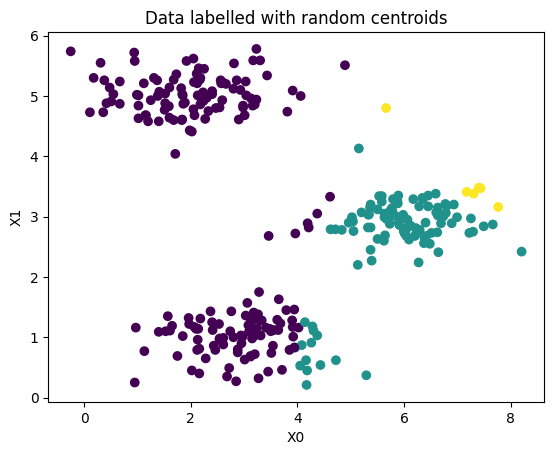

First three elements in idx are: [0. 2. 1.]


In [32]:
# Select initial values for centroids
initial_centroid = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroid)

plt.scatter(X[:,0],X[:,1], c=idx)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data labelled with random centroids')

plt.show()
# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])



Secondly we compute the mean of the new clusters

In [96]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    
    for i in range(K):
        count = 0
        
        for j in range(m):
            
            if( idx[j] == i ):
                centroids[i] += X[j]
                count += 1
                
        centroids[i] = centroids[i] / count
        
    return centroids

In [19]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:\n", centroids)


The centroids are:
 [[2.42795812 3.15806283]
 [5.81359223 2.63427184]
 [7.12       3.61666667]]


Implement K-means algorithm

In [21]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        #assign each point to closest centroid
        idx = find_closest_centroids(X, centroids)
        
        #compute the new centroids
        centroids = compute_centroids(X, idx, K)
        
    return centroids, idx
        

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


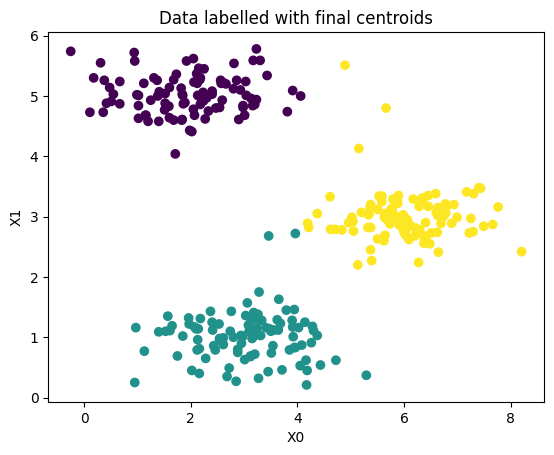

In [35]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

plt.scatter(X[:,0],X[:,1], c=idx)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data labelled with final centroids')

plt.show()

Initialize centroids with points from our dataset

In [40]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


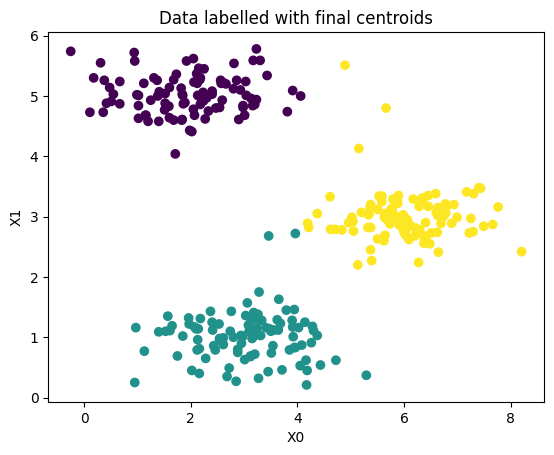

In [41]:
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

plt.scatter(X[:,0],X[:,1], c=idx)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data labelled with final centroids')

plt.show()

use k-means to compress image

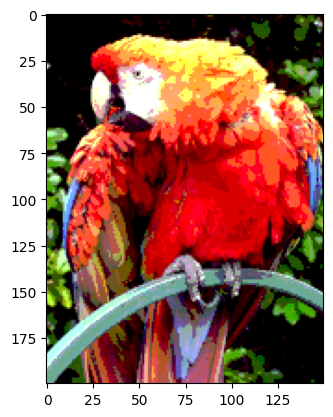

In [62]:
# open image
original_image = plt.imread("bird_img.png")

# Display image
plt.imshow(original_image)

In [63]:
# show image dimensions
print("Shape of original_img is:", original_image.shape)

Shape of original_img is: (200, 150, 3)


In [65]:
# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 200 x 150 = 30000)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.
X_img = np.reshape(original_image, (original_image.shape[0] * original_image.shape[1], 3))

print("Shape of X_img is:", X_img.shape)

Shape of X_img is: (30000, 3)


Perform K-means on the image

In [97]:
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9


C:\Users\Dell\AppData\Local\Temp\ipykernel_10988\2142695136.py:31: RuntimeWarning: invalid value encountered in divide
  centroids[i] = centroids[i] / count


K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [106]:
idx = find_closest_centroids(X_img,centroids)
idx = idx.astype(int)

In [110]:
X_new = centroids[idx, :] 
X_new = np.reshape(X_new,original_image.shape)

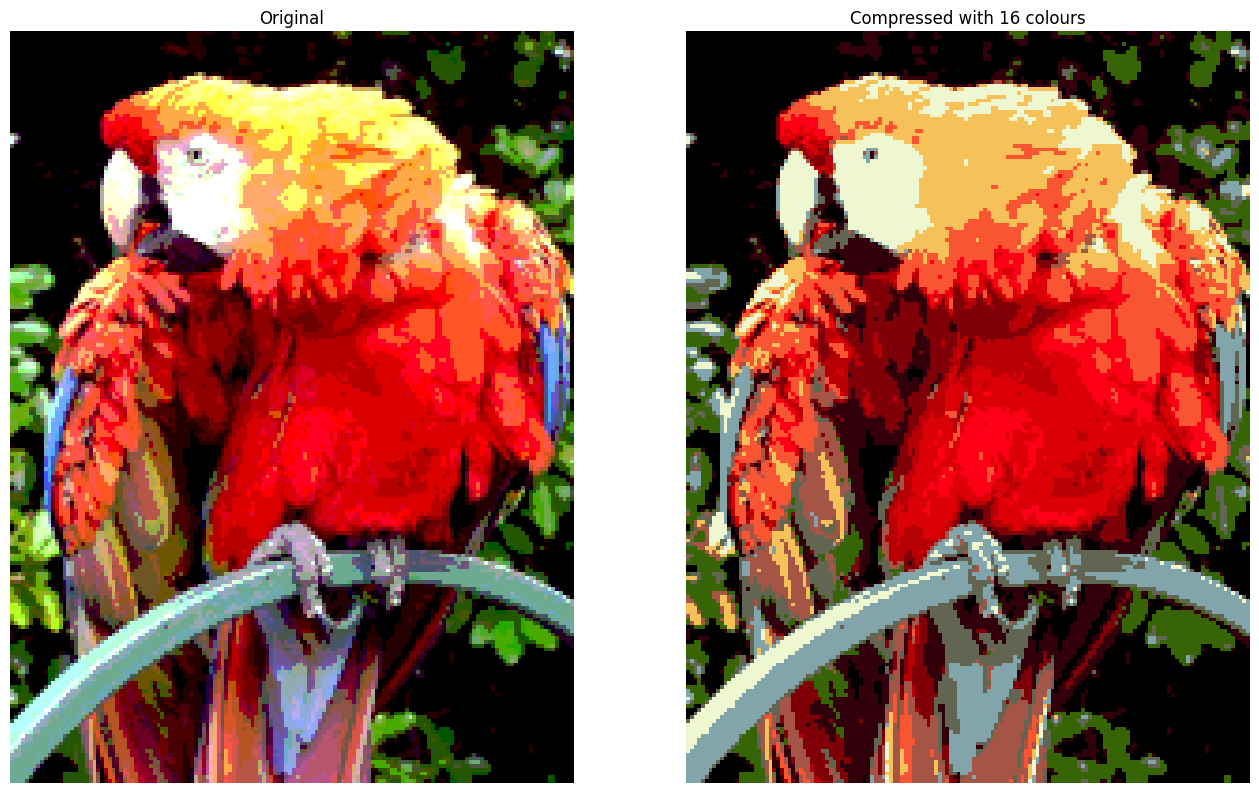

In [111]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_image)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_new)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

# 2 - Anomaly Detection

Prepare Data

In [117]:
X_train = np.array([[13.05,14.74],[13.41,13.76],[14.20,15.85],[14.91,16.17],[13.58,14.04],[13.92,13.41],[12.82,14.22],[15.68,15.89],[16.16,16.20],[12.67,14.90],[13.98,12.96],[14.06,14.55],[13.39,15.56],[13.39,15.63],[13.98,13.28],[14.17,14.47],[13.96,14.75],[14.46,15.07],[14.58,15.83],[12.07,13.07],[13.55,15.54],[13.99,14.79],[14.97,16.52],[14.26,15.29],[15.33,16.12],[15.64,16.49],[13.62,15.46],[14.82,15.34],[14.59,14.61],[14.49,15.64],[15.53,14.64],[13.98,14.77],[12.95,14.82],[12.89,15.08],[16.02,16.26],[14.93,16.30],[12.47,14.18],[14.08,14.44],[14.54,14.24],[14.22,15.42],[14.52,14.00],[13.12,14.66],[14.51,15.30],[14.18,15.39],[14.72,15.73],[13.83,16.17],[16.00,14.69],[14.13,15.91],[13.85,14.34],[15.41,16.24],[13.25,15.01],[13.67,14.36],[13.78,14.74],[14.13,14.93],[14.55,15.63],[14.15,14.54],[14.13,15.34],[14.26,14.99],[14.77,15.25],[14.21,16.15],[13.26,15.48],[14.25,15.03],[12.92,13.19],[13.85,13.33],[13.97,13.20],[13.25,15.37],[13.70,13.21],[14.51,15.46],[15.69,16.48],[12.96,12.44],[13.59,14.84],[15.13,17.15],[14.27,15.68],[15.66,14.81],[14.34,15.49],[14.28,14.71],[14.86,15.59],[14.10,15.18],[15.99,15.62],[13.47,15.59],[13.78,14.99],[12.83,15.67],[13.67,15.12],[15.39,15.57],[15.54,15.52],[13.85,15.61],[13.63,14.45],[15.02,14.92],[13.84,15.25],[14.23,14.35],[13.24,14.61],[13.38,14.73],[13.87,14.97],[12.39,14.64],[14.32,14.53],[15.83,15.72],[15.80,16.02],[14.70,14.11],[14.71,16.46],[13.59,14.92],[12.30,14.77],[13.40,16.12],[15.13,15.90],[15.39,15.71],[15.45,15.44],[13.75,15.27],[15.70,16.06],[14.81,14.33],[15.17,16.71],[11.25,15.13],[13.89,14.49],[15.33,16.59],[12.98,15.16],[14.07,17.22],[14.18,17.83],[12.24,14.73],[14.83,15.95],[13.10,16.23],[13.86,15.04],[15.53,16.79],[15.31,14.57],[14.03,15.66],[14.42,14.94],[13.64,14.96],[14.53,13.36],[14.62,14.15],[13.08,14.03],[14.94,14.55],[16.03,15.71],[14.32,15.12],[14.86,14.28],[14.01,16.78],[13.41,14.60],[13.08,14.19],[12.69,13.81],[14.19,15.36],[14.87,14.47],[13.39,14.34],[13.59,14.39],[13.10,14.38],[14.54,16.37],[14.26,15.04],[16.19,16.36],[13.63,13.63],[14.65,14.98],[12.62,16.77],[13.03,14.26],[10.86,14.48],[12.93,14.61],[13.99,14.96],[12.57,15.20],[15.68,16.22],[13.21,14.35],[13.99,14.52],[13.47,13.66],[13.13,15.80],[14.35,15.02],[13.55,13.73],[12.99,14.81],[14.37,14.95],[13.59,15.20],[12.26,15.61],[13.67,16.45],[14.35,15.45],[14.61,15.78],[14.15,16.57],[14.05,14.39],[14.07,14.62],[15.89,16.34],[13.98,15.84],[10.88,13.46],[13.91,14.98],[12.37,15.14],[15.17,15.52],[15.34,14.23],[13.55,15.73],[13.58,15.47],[14.24,15.09],[15.33,15.71],[15.92,15.16],[13.85,15.32],[14.09,14.31],[12.64,15.65],[14.36,13.87],[14.50,14.62],[13.97,16.17],[15.13,15.29],[15.15,14.01],[13.31,14.39],[14.26,14.30],[13.72,13.53],[15.70,16.00],[13.39,14.37],[14.14,13.97],[14.84,14.02],[12.70,14.27],[14.95,14.73],[14.28,14.61],[13.07,14.83],[13.60,12.20],[12.69,15.81],[13.88,14.12],[14.02,14.34],[15.37,15.83],[13.58,14.88],[13.39,14.34],[13.69,15.92],[12.88,13.20],[13.70,15.42],[14.02,15.82],[14.59,16.38],[15.01,15.51],[14.06,13.76],[14.46,13.34],[14.64,15.04],[13.85,15.87],[14.28,14.02],[14.93,14.33],[13.77,16.51],[13.44,15.08],[14.03,14.41],[13.82,15.59],[16.51,15.22],[12.20,14.32],[14.88,16.36],[15.16,15.15],[11.79,14.55],[12.88,14.57],[13.62,16.42],[14.53,15.45],[12.65,15.11],[15.55,16.43],[14.40,15.21],[15.21,14.94],[15.06,15.12],[14.86,14.70],[15.40,15.34],[13.79,14.69],[14.63,16.30],[12.46,15.55],[14.00,16.74],[12.93,12.62],[13.70,14.71],[13.12,15.45],[13.82,14.09],[13.02,14.25],[14.53,15.77],[13.25,16.32],[13.24,15.34],[12.13,12.67],[14.38,16.03],[15.98,15.52],[13.75,13.64],[13.36,13.42],[13.09,14.87],[13.61,14.87],[15.18,14.15],[14.15,15.29],[13.23,13.96],[13.94,14.76],[15.39,15.71],[13.18,13.67],[13.39,14.67],[15.16,14.78],[14.56,14.05],[14.63,14.30],[13.29,15.66],[13.82,14.17],[14.31,16.25],[13.54,15.77],[14.80,13.82],[13.77,14.65],[13.77,15.02],[14.05,13.94],[15.31,16.04],[13.16,16.92],[12.70,14.00],[14.37,16.76],[13.26,14.10],[11.91,14.61],[13.37,15.18],[15.99,15.45],[14.16,13.77],[14.97,15.59],[14.75,15.47],[13.33,14.35],[13.05,14.69],[13.78,14.24],[15.17,15.51],[14.21,15.08],[13.82,15.61],[14.12,14.96],[14.55,14.86],[14.10,16.03],[14.58,14.26],[14.52,14.23],[14.30,15.27],[14.56,15.49],[14.22,15.86],[12.04,13.34],[13.08,9.35],[21.73,4.13],[12.48,14.46],[19.58,10.41],[23.34,16.30],[18.26,17.98],[4.75,24.35]])
X_val = np.array([[15.79,14.92],[13.64,15.33],[14.87,16.47],[13.58,13.99],[13.46,15.64],[12.95,16.14],[15.31,15.17],[13.90,15.43],[11.92,14.31],[14.86,14.90],[13.64,14.56],[15.76,15.13],[15.22,14.18],[12.11,13.43],[14.81,13.87],[15.36,15.99],[12.73,15.83],[15.39,15.21],[13.82,14.30],[15.38,15.90],[14.11,15.32],[12.82,13.70],[14.58,15.00],[14.29,15.85],[13.51,15.59],[13.71,15.35],[12.86,14.00],[14.57,14.22],[15.59,15.72],[13.10,15.09],[14.61,14.85],[13.93,16.09],[13.29,15.42],[14.33,15.01],[12.99,15.03],[13.22,15.02],[13.73,14.04],[12.60,13.47],[14.03,16.31],[14.06,15.33],[15.27,15.58],[15.88,15.46],[15.07,14.42],[13.98,15.47],[14.16,14.82],[14.69,14.41],[14.12,16.77],[14.32,15.38],[13.31,15.04],[13.55,14.02],[15.17,16.01],[14.28,14.99],[13.34,15.04],[14.38,15.68],[14.33,16.47],[14.62,14.23],[14.17,14.11],[12.97,15.49],[12.37,14.88],[15.15,15.06],[14.09,14.77],[12.59,15.04],[13.62,14.72],[12.67,15.99],[14.70,15.89],[15.28,13.89],[13.27,14.51],[14.14,14.78],[15.29,16.51],[14.67,15.35],[14.03,13.73],[13.77,14.76],[14.55,16.64],[13.89,14.80],[14.43,14.34],[13.39,15.06],[13.83,16.45],[15.21,15.76],[12.37,13.21],[14.55,16.12],[13.10,16.56],[14.22,15.83],[13.80,15.90],[15.19,14.95],[13.86,14.41],[14.81,14.47],[12.80,14.05],[13.70,14.29],[13.32,15.49],[14.09,14.93],[13.77,15.91],[12.50,14.69],[13.36,14.74],[14.57,13.75],[13.55,13.91],[15.11,16.29],[13.05,14.82],[14.75,15.32],[13.14,14.93],[14.35,14.26],[13.13,14.66],[13.87,14.33],[14.77,14.64],[13.62,15.45],[13.54,15.78],[14.88,16.03],[14.75,16.61],[14.07,14.99],[12.78,13.79],[13.61,14.80],[14.22,14.48],[15.59,15.21],[11.85,14.38],[15.14,15.26],[14.61,16.81],[15.73,14.93],[14.55,15.64],[13.65,14.47],[15.19,14.94],[13.90,14.67],[13.02,14.94],[15.15,13.86],[14.14,15.14],[13.73,14.28],[13.77,14.42],[13.11,15.53],[15.15,16.99],[12.28,12.76],[14.70,14.73],[14.55,15.38],[14.27,15.19],[14.70,15.86],[12.25,14.40],[14.75,14.48],[13.46,15.05],[14.76,14.15],[11.62,13.62],[14.55,16.22],[11.84,13.72],[13.69,15.81],[14.85,16.01],[14.76,15.52],[13.53,15.49],[14.62,15.41],[13.37,15.36],[13.87,15.52],[14.49,13.97],[14.65,15.74],[13.34,13.58],[13.78,15.44],[12.30,15.22],[13.86,14.81],[13.71,13.85],[15.39,14.14],[14.12,15.71],[14.50,13.59],[14.07,15.25],[14.23,14.59],[13.40,14.60],[14.47,14.81],[13.60,14.61],[14.32,16.64],[15.60,16.45],[14.58,16.18],[14.44,15.91],[13.24,14.52],[15.35,14.74],[13.94,15.44],[13.20,12.47],[13.32,16.22],[15.03,15.67],[15.01,16.17],[15.11,15.96],[13.10,14.25],[13.29,13.12],[13.70,15.53],[13.25,13.22],[13.49,14.13],[13.17,14.83],[13.45,14.66],[14.11,14.99],[14.18,16.77],[12.14,13.89],[13.95,15.93],[13.34,15.10],[14.11,15.98],[14.88,15.45],[14.36,14.06],[12.58,14.07],[13.42,15.10],[12.30,14.16],[13.97,14.63],[12.96,11.87],[14.12,15.74],[13.34,14.38],[13.71,15.37],[12.71,14.93],[13.61,15.22],[13.40,15.85],[15.16,16.46],[14.68,16.01],[15.17,13.56],[14.75,14.67],[15.24,16.29],[13.64,15.18],[13.01,13.94],[15.34,16.04],[13.36,14.92],[14.91,14.85],[14.35,15.45],[14.60,14.84],[15.33,15.85],[13.36,15.55],[12.38,14.26],[14.45,14.45],[12.99,16.49],[12.25,13.70],[13.78,15.44],[15.54,15.78],[12.71,15.83],[13.84,14.52],[14.01,15.06],[12.75,15.76],[14.54,14.91],[12.53,13.55],[14.82,15.41],[13.35,14.99],[13.10,15.21],[13.16,16.15],[14.53,14.90],[13.90,13.84],[14.99,15.34],[13.58,15.59],[14.12,13.82],[12.97,14.22],[17.07,14.54],[15.39,16.72],[14.16,15.41],[13.95,16.35],[14.68,16.30],[14.47,15.15],[13.36,13.04],[12.03,14.28],[14.69,14.97],[13.22,15.06],[14.94,16.86],[15.60,18.96],[13.03,16.71],[15.01,16.68],[14.52,14.53],[14.85,14.19],[14.59,14.37],[15.79,16.20],[13.92,14.38],[14.96,16.70],[14.53,14.62],[11.78,14.73],[12.86,14.00],[13.02,15.00],[15.15,15.87],[14.19,14.67],[12.18,13.19],[13.79,14.15],[13.69,15.96],[13.84,15.24],[14.74,14.52],[12.94,15.46],[13.65,13.98],[15.59,15.05],[13.77,15.37],[16.22,14.39],[13.56,13.83],[14.71,15.17],[14.28,15.55],[13.23,13.70],[13.17,13.04],[15.22,15.70],[13.08,14.47],[13.68,14.24],[12.77,14.87],[14.87,15.50],[15.15,16.30],[13.03,14.37],[16.30,14.08],[13.72,16.43],[13.77,13.43],[15.06,15.41],[12.32,14.07],[14.23,15.52],[14.68,14.84],[14.22,14.61],[14.38,15.41],[14.75,16.98],[13.77,13.52],[14.03,14.18],[12.71,14.42],[14.22,16.28],[14.29,15.99],[14.95,14.36],[14.73,15.82],[19.29,10.68],[8.74,16.80],[0.31,5.39],[28.54,21.60],[19.03,12.03],[14.38,23.36],[8.78,16.69]])
y_val = np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])
print ('The shape of X_train is:', X_train.shape)
print ('The shape of X_val is:', X_val.shape)
print ('The shape of y_val is: ', y_val.shape)

The shape of X_train is: (307, 2)
The shape of X_val is: (307, 2)
The shape of y_val is:  (307,)


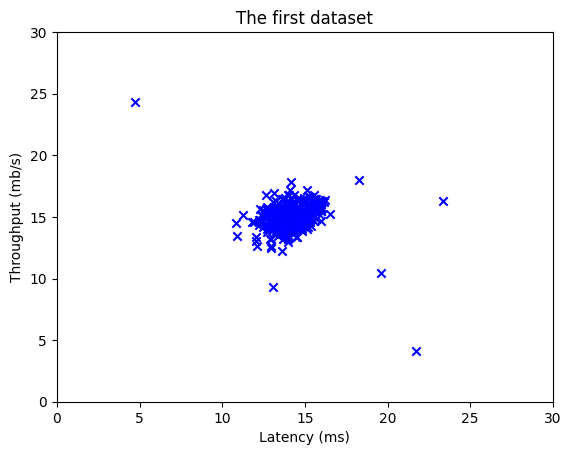

In [118]:
# Create a scatter plot of the data. To change the markers to blue "x",
# we used the 'marker' and 'c' parameters
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b') 

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

implement compute gaussian to be used

In [148]:
def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """
    
    mu = np.zeros(X.shape[1])
    var = np.zeros(X.shape[1])
    
    for i in range(X.shape[1]):
        mu[i] = np.sum(X[:,i]) / X.shape[0]
        var[i] = (np.sum((X[:,i]-mu[i])**2)) / X.shape[0]
        
    return mu, var
        

In [149]:
mu, var = estimate_gaussian(X_train)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [14.11221498 14.997557  ]
Variance of each feature: [1.83276904 1.70958524]


we have to select the threshold '𝜖'

In [163]:
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 
    
    # Try 1000 values for epsilon
    step_size = (max(p_val) - min(p_val)) / 1000
    
    best_epsilon = 0
    F1 = 0
    F1_max = 0
    
    for epsilon in np.arange(min(p_val),max(p_val),step_size):

        predictions = (p_val < epsilon)
        
        fp = sum((predictions == 1) & (y_val == 0))
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        
        prec = tp / (tp + fp)   
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        if(F1 > F1_max):
            F1_max = F1
            best_epsilon = epsilon
            
    return best_epsilon, F1_max
            
        
    

In [164]:
p_val = np.array([0.042,0.082,0.041,0.062,0.071,0.042,0.060,0.084,0.021,0.077,0.080,0.043,0.053,0.015,0.054,0.044,0.044,0.057,0.076,0.046,0.087,0.035,0.085,0.072,0.074,0.083,0.044,0.071,0.042,0.068,0.083,0.063,0.071,0.089,0.064,0.072,0.066,0.024,0.054,0.087,0.057,0.036,0.063,0.084,0.089,0.074,0.036,0.085,0.075,0.062,0.049,0.089,0.076,0.077,0.047,0.071,0.071,0.059,0.039,0.067,0.089,0.048,0.082,0.038,0.065,0.043,0.069,0.089,0.032,0.080,0.056,0.086,0.039,0.088,0.077,0.078,0.047,0.055,0.016,0.059,0.033,0.073,0.069,0.066,0.080,0.073,0.043,0.074,0.071,0.090,0.068,0.043,0.075,0.054,0.058,0.042,0.065,0.078,0.069,0.076,0.067,0.078,0.077,0.079,0.069,0.056,0.038,0.090,0.036,0.083,0.083,0.049,0.020,0.066,0.032,0.044,0.076,0.078,0.066,0.086,0.065,0.046,0.089,0.074,0.079,0.063,0.021,0.008,0.080,0.082,0.088,0.066,0.032,0.074,0.080,0.065,0.010,0.055,0.014,0.071,0.057,0.074,0.076,0.080,0.074,0.082,0.064,0.071,0.042,0.082,0.036,0.087,0.059,0.046,0.077,0.049,0.088,0.085,0.075,0.086,0.080,0.041,0.027,0.056,0.068,0.068,0.058,0.084,0.011,0.049,0.062,0.048,0.052,0.058,0.027,0.079,0.029,0.065,0.070,0.077,0.090,0.036,0.022,0.069,0.076,0.068,0.072,0.068,0.037,0.079,0.030,0.086,0.004,0.077,0.068,0.083,0.052,0.083,0.063,0.036,0.061,0.036,0.078,0.039,0.084,0.047,0.043,0.077,0.075,0.083,0.084,0.049,0.070,0.034,0.080,0.033,0.021,0.082,0.043,0.043,0.083,0.090,0.046,0.085,0.025,0.075,0.077,0.067,0.048,0.086,0.060,0.070,0.075,0.060,0.053,0.008,0.024,0.086,0.052,0.050,0.086,0.025,0.024,0.082,0.072,0.027,0.000,0.028,0.031,0.081,0.064,0.075,0.027,0.080,0.032,0.082,0.020,0.044,0.065,0.054,0.087,0.013,0.071,0.065,0.087,0.076,0.058,0.063,0.049,0.084,0.024,0.056,0.081,0.082,0.044,0.023,0.056,0.062,0.072,0.055,0.072,0.041,0.058,0.019,0.047,0.043,0.067,0.029,0.083,0.082,0.086,0.084,0.026,0.046,0.074,0.048,0.055,0.067,0.066,0.066,0.000,0.000,0.000,0.000,0.000,0.000,0.000])
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)
    
# UNIT TEST



Best epsilon found using cross-validation: 9.000000e-05
Best F1 on Cross Validation Set: 0.823529


C:\Users\Dell\AppData\Local\Temp\ipykernel_10988\240035345.py:31: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)


# 3 - Collaborative Filtering Recommender Systems

Read Data

In [235]:
num_movies = 200
num_users = 100
num_features = 10

X = np.zeros([num_movies, num_features])
W = np.zeros([num_users, num_features])
b = np.zeros([1,num_users])
Y = np.full((num_movies, num_users),6)
R = np.zeros([num_movies, num_users])

df = pd.read_csv('ml-latest-small/ratings.csv')

Prepare the data

In [236]:
movie_ids = df['movieId'].tolist()
user_ids = df['userId'].tolist()
movie_ratings = df['rating'].tolist()

for i in range(num_users):
    for j in range(len(user_ids)):
        if( i == user_ids[j] ):
            if(movie_ids[j]<=num_movies):
                Y[movie_ids[j]-1,i] = movie_ratings[j]

for i in range(num_movies):
    for j in range(num_users):
        if(Y[i,j]==6):
            R[i,j] = 0
        else:
            R[i,j] = 1
    

In [237]:
print("Y", Y.shape, "R", R.shape)
print("X", X.shape)
print("W", W.shape)
print("b", b.shape)
print("num_features", num_features)
print("num_movies",   num_movies)
print("num_users",    num_users)

Y (200, 100) R (200, 100)
X (200, 10)
W (100, 10)
b (1, 100)
num_features 10
num_movies 200
num_users 100


Implement cost function

In [238]:
def cofi_cost_func(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    
    nm, nu = X.shape
    cost = 0
    reg = 0
    for i in range(nu):
        for j in range(nm):
            cost += R[j,i] * (np.dot(W[i],X[j])+b[0,i]-Y[j,i])**2
    cost = cost / 2
    
    reg = np.sum(W**2) + np.sum(X**2)
    reg = reg * lambda_/2
    
    J = cost + reg
    return J

In [239]:
J = cofi_cost_func(X, W, b, Y, R, 0)
print(f"Cost with no regularization: {J:0.2f}")

J = cofi_cost_func(X, W, b, Y, R, 1.5)
print(f"Cost with regularization: {J:0.2f}")

Cost with no regularization: 932.50
Cost with regularization: 932.50


Normalize our data

In [240]:
Y_mean = Y.mean()
Y_norm = (Y - Y_mean)

Train our collaborative filtering model. This will learn the parameters  𝐗
 ,  𝐖
 , and  𝐛
 .

In [241]:
# Set Initial Parameters (W, X, b), use tf.Variable to track these variables
W = tf.Variable(tf.random.normal((num_users,  num_features),dtype=tf.float64),  name='W')
X = tf.Variable(tf.random.normal((num_movies, num_features),dtype=tf.float64),  name='X')
b = tf.Variable(tf.random.normal((1,          num_users),   dtype=tf.float64),  name='b')


In [251]:
iterations = 1
lambda_ = 1

# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=0.1)

for iter in range(iterations):
    
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost 
    with tf.GradientTape() as tape:
        # Compute the cost
        cost_value = cofi_cost_func(X, W, b, Y_norm, R, lambda_)
    
    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient(cost_value,[X,W,b])
    
    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [X,W,b]) )
    
    # Log periodically.
    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 2703.8


Use our trained system to predect ratings

In [252]:
p = np.matmul(X.numpy(),np.transpose(W.numpy())) + b.numpy()

p = p + Y_mean


# 4 - Principal Component Analysis (PCA)

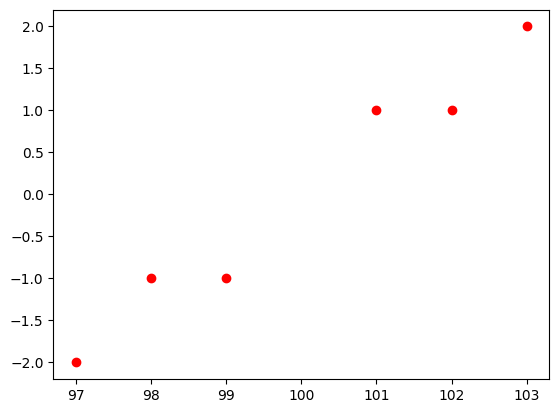

In [254]:
X = np.array([[ 99,  -1],[ 98,  -1],[ 97,  -2],[101,   1],[102,   1],[103,   2]])   

plt.plot(X[:,0], X[:,1], 'ro') 

In [ ]:
# Create our PCA object with 2 principal components
pca2 = PCA(n_components=2)
pca2

PCA(n_components=2)

In [ ]:
# fit our data to get the 2 axes
pca2.fit(X)

PCA(n_components=2)

In [ ]:
# see how much these components describe our data
pca2.explained_variance_ratio_

array([0.99244289, 0.00755711])

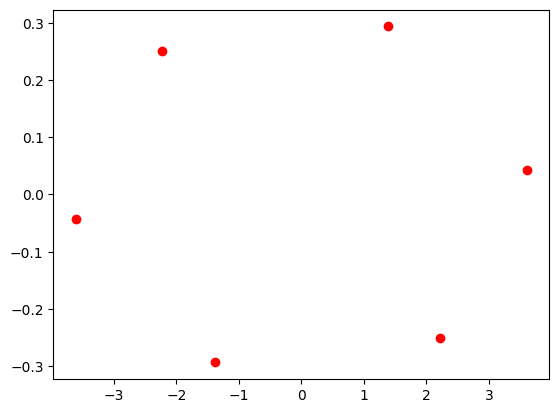

In [271]:
# transform our data to the new axes
X_trans2 = pca2.transform(X)

plt.plot(X_trans2[:,0], X_trans2[:,1], 'ro') 

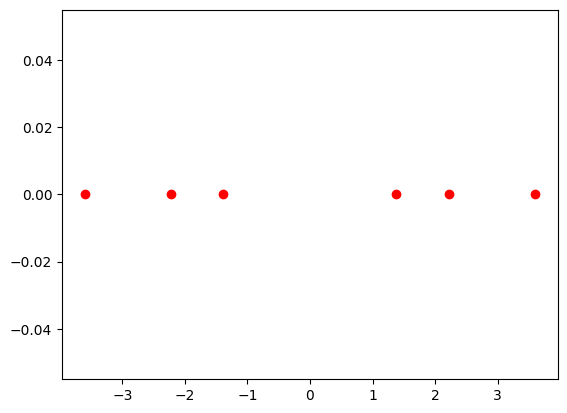

In [272]:
# repeat with only 1 principal component
pca1 = PCA(n_components=1)
pca1.fit(X)


X_trans1 = pca1.transform(X)
plt.plot(X_trans1[:,0],np.zeros(len(X_trans1)), 'ro') 

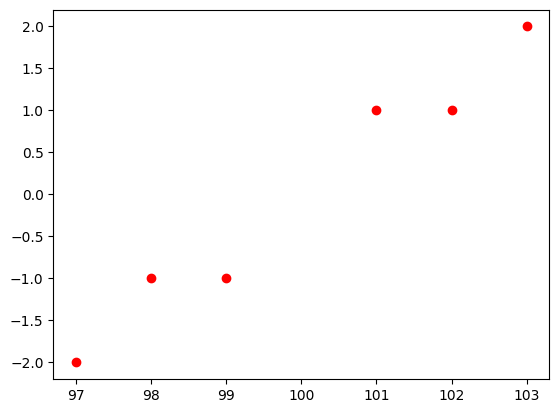

In [273]:
# Get the original data from the transformed one

X_reduced2 = pca2.inverse_transform(X_trans2)

plt.plot(X_reduced2[:,0], X_reduced2[:,1], 'ro') 